## How to implement OLS with python... 

In [1]:
! pip install numpy pandas tqdm matplotlib statsmodels ISLP

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots 
import statsmodels.api as sm 
from ISLP import load_data

Define a plotting function called `abline(ax, b, a)`  where `ax` is the matplotlib axis, `b` is the bias of linear model, `a` is the weigth of linear model... 

In [3]:
def abline(ax, b, a, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [a* xlim[0] + b, a * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs) 

Example of how to use the OLS package `sm.OLS` from `statsmodels.api`. 

At first, we load the data to be predicted as `y` and the input data into `X`.

Note that we use the entire dataset for training. 

In [4]:
Boston = load_data("Boston")
Boston.columns

X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X[:4]

y = Boston['medv']


- Now apply the data to generate the least square model from `sm.OLS` 
- Then, you will start training the model for the weights from `model.fit` 
- The learnt weights are in `results.params`

In [5]:
model = sm.OLS(y, X)
results = model.fit() 

Here, we plot the output weights using `abline(ax, b, a)`  
Hint! You may compare what are `a` and `b` by looking at `results.params[0]` and `results.params[1]` 

/tmp/ipykernel_93825/1198889689.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipykernel_93825/1198889689.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


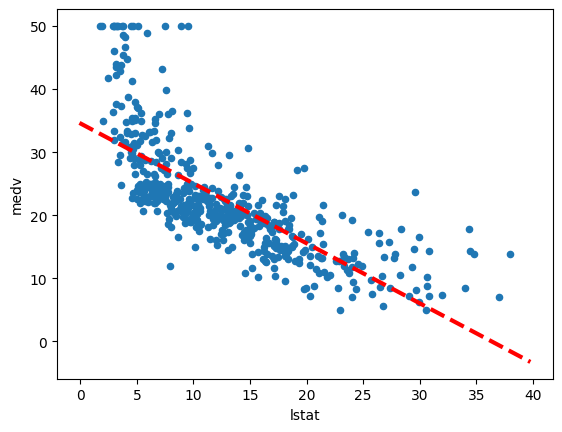

In [6]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

To visualize the results from `sm.OLS` function, you can use `results.summary()`

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           5.08e-88
Time:                        15:16:04   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise: Implement OLS in my_OLS(y,X) using linalg.pinv(). 

Implement OLS in my_OLS(y,X) using linalg.pinv(). 

Here `my_OLS` is expected to receive the numpy arrays `y_` and `X_` 
- `y_` is an array of size n x 1 containing n measurements.  
- `X_` is an array of size n x 2 containing nx2 input features.  

How to use `linalg.pinv()` can be found here: [numpy.linalg.pinv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)

In [8]:
from scipy import linalg

def my_OLS(y_, X_): 

    w =  
    
    return w

Here we prepare `y_` and `X_` for you. 

In [9]:
y_ = y.values.reshape((len(y.values),1)) 
X_ =  np.stack([np.ones(Boston.shape[0]), Boston['lstat'].values], axis =1)

You can check the size of numpy arrays `y_` and `X_`
e.g., y_.shape, X_.shape, or the value of X_ by printing `X_` 

In [10]:
# X_.shape

Now let's apply my_OLS to `y_` and `X_`, you will get the estimated bias and weights in `w`.

In [11]:
w = my_OLS(y_, X_)

You may try to print your result in the next cell and check if the lenght of `w` is the same as `results.params`

In [ ]:
print(w) #print(results.params)

In [13]:
# print(len(w) == len(results.params))

True


Finally here is the comparison between the linear model from `my_OLS` and `sm.OLS`

/tmp/ipykernel_93825/600085632.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1], 'r--',  linewidth=3, label="OLS")


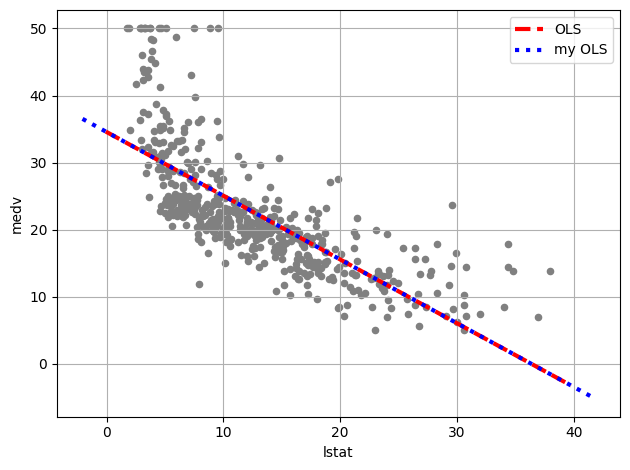

In [14]:
import matplotlib.pyplot as plt
 
ax = Boston.plot.scatter('lstat', 'medv', color="grey")
abline(ax, results.params[0], results.params[1], 'r--',  linewidth=3, label="OLS")
abline(ax, w[0], w[1], 'b:', linewidth=3, label="my OLS") 
plt.legend()
plt.grid('both')
plt.tight_layout() 
plt.savefig("OLS_comparing_w.png")